---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-text-mining/resources/d9pwm) course resource._

---

*Note: Some of the cells in this notebook are computationally expensive. To reduce runtime, this notebook is using a subset of the data.*

# Case Study: Sentiment Analysis

### Data Prep

In [1]:
friends_chars={} 
Rachel=[]
Ross=[]
Joey=[]
Chandler=[]
Phoebe=[]
Monica=[]
with open("transcripts_friends/season_all/merged.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        #print("Line {}: {}".format(cnt, line))
        if line.startswith('Rachel:'):
            Rachel.append(line[8:])
        elif line.startswith('Ross:'):
            Ross.append(line[6:])
        elif line.startswith('Monica:'):
            Monica.append(line[8:])
        elif line.startswith('Chandler:'):
            Chandler.append(line[10:])
        if line.startswith('Phoebe:'):
            Phoebe.append(line[8:])
        if line.startswith('Joey:'):
            Joey.append(line[6:])

friends_chars['RACHEL']=Rachel
friends_chars['ROSS']=Ross
friends_chars['MONICA']=Monica
friends_chars['PHOEBE']=Phoebe
friends_chars['CHANDLER']=Chandler
friends_chars['JOEY']=Joey

with open("transcripts_friends/season_all/rachel.txt", "w") as f_r:
    s=''
    for line in Rachel:
        s=s+''+line
        
        
    f_r.write(s)
        
with open("transcripts_friends/season_all/monica.txt", "w") as f_m:
    for line in Monica:
        f_m.write(line)
    
f_r.close()
f_m.close()

In [2]:
friends_chars['RACHEL']

['(through wall) Ooh... I love Barbados!\n',
 "I know, I'm her!\n",
 'ooh...\n',
 'Hey, you know, before you said that nothing could happen between us? What changed?\n',
 "What? Ross and Charlie? (Joey nods) Wow! She's really making her way through the group, huh? Ah, who am I to talk?\n",
 "Oh, ju-ju-just stay calm. Just be calm. For all he knows we're just hanging out together. Right? Just be nonchalant. (Joey like stands at attention with his chest forward and his hands on his sides, looking up at the ceiling with his lips pouted.) That's not nonchalant!\n",
 'Oh... okay, just hide!\n',
 'Coming! Try under the bed, try under the bed!\n',
 "There's no room under the bed. (looks around because she can't find Joey anymore)\n",
 'Yeah... (still looking to see where Joey went, and opens the door)\n',
 'Hi...\n',
 "...I really don't... (looks around again)\n",
 'Yeah, sure... (looks outside into the corridor if Joey is there)\n',
 '(clearly not listening and still trying to find out where

In [3]:
import pandas as pd
df6 = pd.DataFrame(friends_chars['MONICA'])
df5 = pd.DataFrame(friends_chars['ROSS'])

df4 = pd.DataFrame(friends_chars['RACHEL'])
df3 = pd.DataFrame(friends_chars['PHOEBE'])

df2 = pd.DataFrame(friends_chars['JOEY'])
df1 = pd.DataFrame(friends_chars['CHANDLER'])

In [4]:
df1.head()

,0
0,"You know, I'd love to, but I'm a little tired.\n"
1,You're on!\n
2,He could be alone. This morning I heard him do...
3,She's cheating on Joey with Ross!\n
4,Wow!\n


In [5]:
df1.shape

(16331, 1)

In [6]:
listOfScores1 = ['Chandler'] *df1.shape[0]
listOfScores2 = ['Joey'] *df2.shape[0]
listOfScores3 = ['Phoebe'] *df3.shape[0]
listOfScores4 = ['Rachel'] *df4.shape[0]
listOfScores5 = ['Ross'] *df5.shape[0]
listOfScores6 = ['Monica'] *df6.shape[0]


In [7]:
df1['Score'] = listOfScores1
df2['Score'] = listOfScores2 
df3['Score'] = listOfScores3
df4['Score'] = listOfScores4
df5['Score'] = listOfScores5
df6['Score'] = listOfScores6


In [8]:
df1=df1.rename(columns={0: 'dialogue'})
df2=df2.rename(columns={0: 'dialogue'})
df3=df3.rename(columns={0: 'dialogue'})
df4=df4.rename(columns={0: 'dialogue'})
df5=df5.rename(columns={0: 'dialogue'})
df6=df6.rename(columns={0: 'dialogue'})

In [9]:
df = pd.concat([df1, df2,df3,df4,df5,df6])
df.tail()

,dialogue,Score
16323,But... you suck!\n,Monica
16324,Oh my God! You're good!\n,Monica
16325,(to Chandler) Oh my God. That was so amazing! ...,Monica
16326,Why?\n,Monica
16327,This is so great! Now we can enter into double...,Monica


In [10]:
from io import StringIO
col = ['Score', 'dialogue']
df = df[col]
df = df[pd.notnull(df['dialogue'])]
df.columns = ['Score', 'dialogue']
df['category_id'] = df['Score'].factorize()[0]
category_id_df = df[['Score', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Score']].values)
df.tail()


,Score,dialogue,category_id
16323,Monica,But... you suck!\n,5
16324,Monica,Oh my God! You're good!\n,5
16325,Monica,(to Chandler) Oh my God. That was so amazing! ...,5
16326,Monica,Why?\n,5
16327,Monica,This is so great! Now we can enter into double...,5


In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt


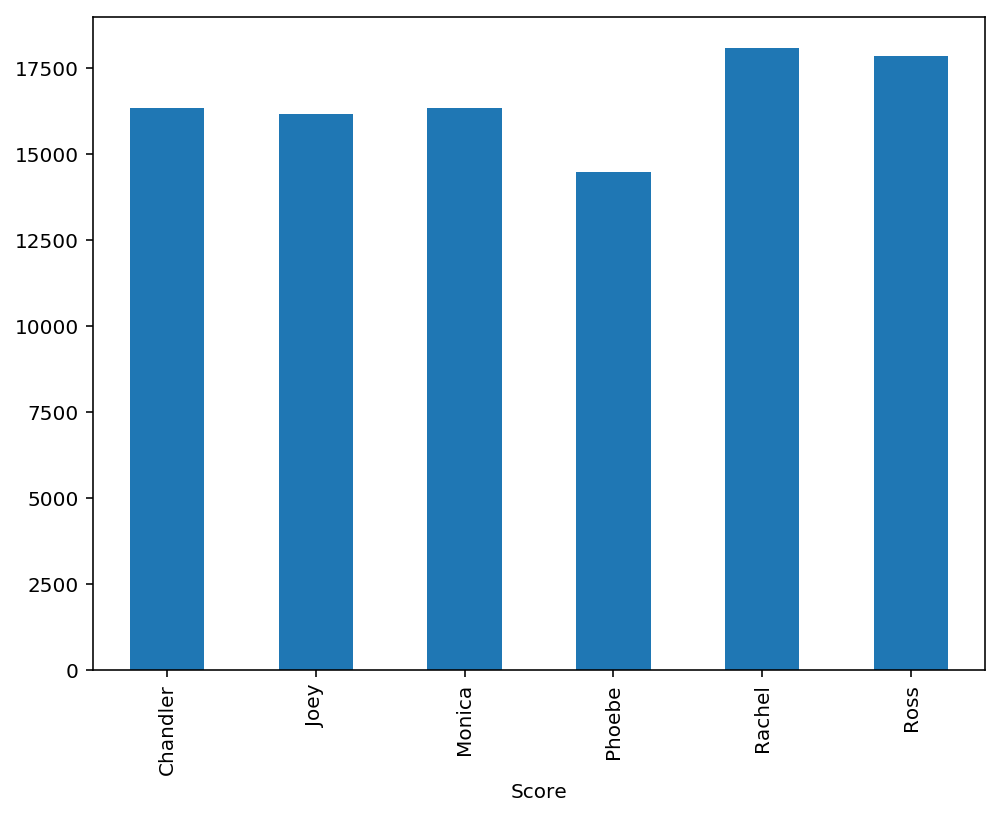

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Score').dialogue.count().plot.bar(ylim=0)
plt.show()

In [13]:
def print_plot(index):
    example = df[df.index == index][['dialogue']].values[0]
    if len(example) > 0:
        print(example[0])
        print('dialogue:', example[0])
print_plot(10)

And she's... turning on the TV... and watching... Miss Congeniality!

dialogue: And she's... turning on the TV... and watching... Miss Congeniality!



In [14]:
import re
from nltk.corpus import stopwords


df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['dialogue'] = df['dialogue'].apply(clean_text)
df['dialogue'] = df['dialogue'].str.replace('\d+', '')

In [15]:
print_plot(10)

shes turning tv watching miss congeniality
dialogue: shes turning tv watching miss congeniality


In [16]:
!pip3 install keras

You should consider upgrading via the 'pip install --upgrade pip' command.


In [16]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [19]:

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 200
# This is fixed.
EMBEDDING_DIM = 128
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['dialogue'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 15971 unique tokens.


In [20]:
X = tokenizer.texts_to_sequences(df['dialogue'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (99233, 200)


In [21]:
Y = pd.get_dummies(df['category_id']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (99233, 6)


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(89309, 200) (89309, 6)
(9924, 200) (9924, 6)


In [23]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          6400000   
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                614424    
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 150       
Total params: 7,014,574
Trainable params: 7,014,574
Non-trainable params: 0
_________________________________________________________________


In [26]:
num_epochs = 10
model.fit(X_train, Y_train, epochs=num_epochs, validation_data=(X_test, Y_test))

Train on 89309 samples, validate on 9924 samples
Epoch 1/10
89309/89309 [==============================] - 206s 2ms/sample - loss: 1.7898 - accuracy: 0.1811 - val_loss: 1.7890 - val_accuracy: 0.1803
Epoch 2/10
75808/89309 [========================>.....] - ETA: 30s - loss: 1.7892 - accuracy: 0.1828

KeyboardInterrupt: 

In [107]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(50000, 128)


In [108]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(X_train[1]))
print(X_train[1])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? dont talking laughs nervously continues leaqve
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0   

In [109]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, len(reverse_word_index)):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [110]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [111]:
sentence = "You’re gonna mess it up let me do it."
sequence = tokenizer.texts_to_sequences(sentence)
print(sequence)

[[], [], [8300], [], [3459], [2524], [], [3951], [], [2971], [2971], [10519], [], [], [2524], [3284], [3284], [], [], [], [], [8300], [7968], [], [6650], [2524], [], [], [], [2524], [], [3990], [], [], [], [], []]


In [24]:
from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(500, dropout=0.2, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

W0814 11:59:56.154127 140736012301184 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 80378 samples, validate on 8931 samples
Epoch 1/10
 2688/80378 [>.............................] - ETA: 21:17 - loss: 1.7944 - accuracy: 0.1682

KeyboardInterrupt: 

In [27]:
#tokenizer = info.features['text'].encoder

NameError: name 'info' is not defined

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 80378 samples, validate on 8931 samples
Epoch 1/10
80378/80378 [==============================] - 453s 6ms/sample - loss: 1.6894 - accuracy: 0.2800 - val_loss: 1.5677 - val_accuracy: 0.3636
Epoch 2/10
80378/80378 [==============================] - 447s 6ms/sample - loss: 1.3696 - accuracy: 0.4653 - val_loss: 1.3878 - val_accuracy: 0.4527
Epoch 3/10
80378/80378 [==============================] - 453s 6ms/sample - loss: 1.1390 - accuracy: 0.5521 - val_loss: 1.3003 - val_accuracy: 0.4931
Epoch 4/10
80378/80378 [==============================] - 444s 6ms/sample - loss: 1.0160 - accuracy: 0.5939 - val_loss: 1.2319 - val_accuracy: 0.5311
Epoch 5/10
80378/80378 [==============================] - 439s 5ms/sample - loss: 0.9400 - accuracy: 0.6200 - val_loss: 1.1986 - val_accuracy: 0.5495
Epoch 6/10
80378/80378 [==============================] - 454s 6ms/sample - loss: 0.8845 - accuracy: 0.6410 - val_loss: 1.1997 - val_accuracy: 0.5686
Epoch 7/10
80378/80378 [===========================

In [35]:
from sklearn.externals import joblib
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)

# some time later...

# # load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, Y_test)
# print(result)


TypeError: can't pickle _thread.RLock objects

In [33]:
# save the model to disk
filename = 'predict_Speaker_from_Dialogue_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

TypeError: can't pickle _thread.RLock objects

In [36]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

9924/9924 [==============================] - 31s 3ms/sample - loss: 1.2262 - accuracy: 0.6166
Test set
  Loss: 1.226
  Accuracy: 0.617


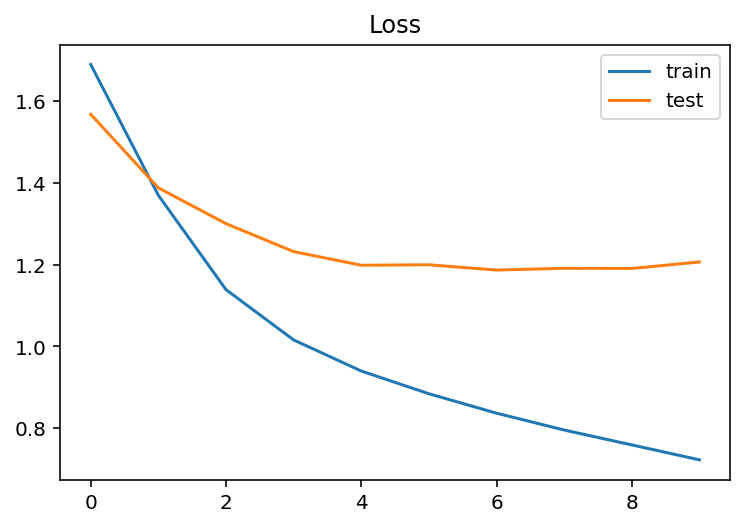

In [37]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.dialogue).toarray()
labels = df.Score
features.shape

(99233, 20126)

In [39]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Score, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Score))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Chandler':
  . Most correlated unigrams:
. heyhey
. zoo
  . Most correlated bigrams:
. hey whats
. hey yknow
# 'Joey':
  . Most correlated unigrams:
. heyhey
. zoo
  . Most correlated bigrams:
. hey whats
. hey yknow
# 'Monica':
  . Most correlated unigrams:
. heyhey
. zoo
  . Most correlated bigrams:
. hey whats
. hey yknow
# 'Phoebe':
  . Most correlated unigrams:
. heyhey
. zoo
  . Most correlated bigrams:
. hey whats
. hey yknow
# 'Rachel':
  . Most correlated unigrams:
. heyhey
. zoo
  . Most correlated bigrams:
. hey whats
. hey yknow
# 'Ross':
  . Most correlated unigrams:
. heyhey
. zoo
  . Most correlated bigrams:
. hey whats
. hey yknow


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['dialogue'], df['Score'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [41]:
print(clf.predict(count_vect.transform(["Yeah, well you promised Barry, you d marry him. (Rachel glares at her, and she retreats to safety between Richards legs)"])))

['Ross']


In [42]:
print(clf.predict(count_vect.transform(["And I will be using his dead body as a shield"])))

['Joey']


In [19]:
!pip3 install seaborn


You should consider upgrading via the 'pip install --upgrade pip' command.


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


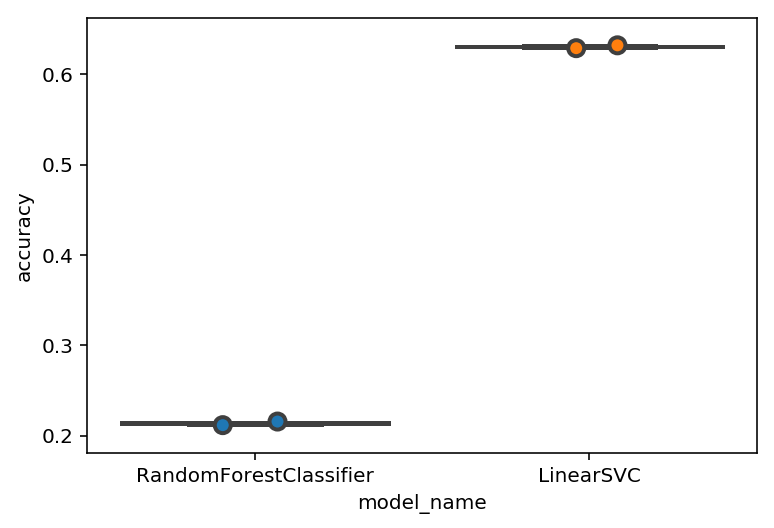

In [56]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(multi_class="crammer_singer"),
    #LogisticRegression(multi_class="multinomial")
]
CV = 2
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [ ]:
sklearn.naive_bayes.BernoulliNB
sklearn.tree.DecisionTreeClassifier
sklearn.tree.ExtraTreeClassifier
sklearn.ensemble.ExtraTreesClassifier
sklearn.naive_bayes.GaussianNB
sklearn.neighbors.KNeighborsClassifier
sklearn.semi_supervised.LabelPropagation
sklearn.semi_supervised.LabelSpreading
sklearn.discriminant_analysis.LinearDiscriminantAnalysis
sklearn.svm.LinearSVC (setting multi_class=”crammer_singer”)
sklearn.linear_model.LogisticRegression (setting multi_class=”multinomial”)
sklearn.linear_model.LogisticRegressionCV (setting multi_class=”multinomial”)
sklearn.neural_network.MLPClassifier
sklearn.neighbors.NearestCentroid
sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis
sklearn.neighbors.RadiusNeighborsClassifier
sklearn.ensemble.RandomForestClassifier
sklearn.linear_model.RidgeClassifier
sklearn.linear_model.RidgeClassifierCV

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    #RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(multi_class="crammer_singer"),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


E0814 23:20:36.300722 140736012301184 ultratb.py:149] Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-54-22a573826aca>", line 16, in <module>
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  File "/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 389, in cross_val_score
    error_score=error_score)
  File "/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 231, in cross_validate
    for train, test in cv.split(X, y, groups))
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch


KeyboardInterrupt: 

In [57]:
cv_df.groupby('model_name').accuracy.mean()


model_name
LinearSVC                 0.630566
RandomForestClassifier    0.213518
Name: accuracy, dtype: float64

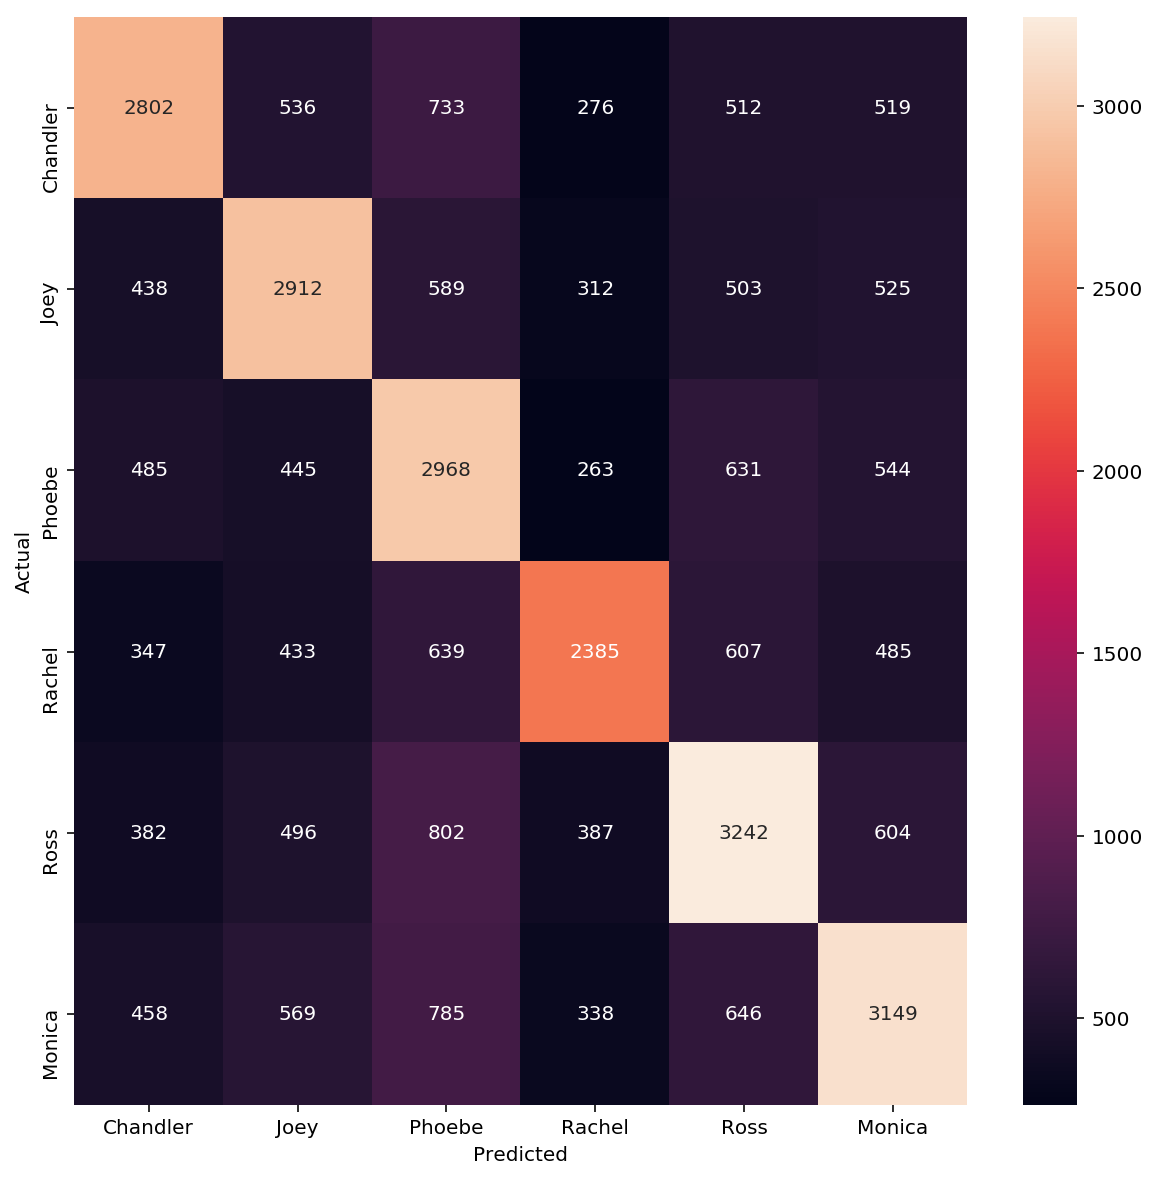

In [65]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Score.values, yticklabels=category_id_df.Score.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [23]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Score', 'dialogue']])
      print('')

'Joey' predicted as 'Chandler' : 365 examples.


,Score,dialogue



'Phoebe' predicted as 'Chandler' : 400 examples.


,Score,dialogue



'Rachel' predicted as 'Chandler' : 270 examples.


,Score,dialogue



'Ross' predicted as 'Chandler' : 374 examples.


,Score,dialogue



'Monica' predicted as 'Chandler' : 385 examples.


,Score,dialogue



'Chandler' predicted as 'Joey' : 463 examples.


,Score,dialogue



'Phoebe' predicted as 'Joey' : 356 examples.


,Score,dialogue



'Rachel' predicted as 'Joey' : 344 examples.


,Score,dialogue



'Ross' predicted as 'Joey' : 395 examples.


,Score,dialogue



'Monica' predicted as 'Joey' : 474 examples.


,Score,dialogue



'Chandler' predicted as 'Phoebe' : 567 examples.


,Score,dialogue



'Joey' predicted as 'Phoebe' : 386 examples.


,Score,dialogue



'Rachel' predicted as 'Phoebe' : 433 examples.


,Score,dialogue



'Ross' predicted as 'Phoebe' : 606 examples.


,Score,dialogue



'Monica' predicted as 'Phoebe' : 568 examples.


,Score,dialogue



'Chandler' predicted as 'Rachel' : 281 examples.


,Score,dialogue



'Joey' predicted as 'Rachel' : 218 examples.


,Score,dialogue



'Phoebe' predicted as 'Rachel' : 297 examples.


,Score,dialogue



'Ross' predicted as 'Rachel' : 322 examples.


,Score,dialogue



'Monica' predicted as 'Rachel' : 308 examples.


,Score,dialogue



'Chandler' predicted as 'Ross' : 521 examples.


,Score,dialogue



'Joey' predicted as 'Ross' : 495 examples.


,Score,dialogue



'Phoebe' predicted as 'Ross' : 618 examples.


,Score,dialogue



'Rachel' predicted as 'Ross' : 529 examples.


,Score,dialogue



'Monica' predicted as 'Ross' : 555 examples.


,Score,dialogue



'Chandler' predicted as 'Monica' : 364 examples.


,Score,dialogue



'Joey' predicted as 'Monica' : 326 examples.


,Score,dialogue



'Phoebe' predicted as 'Monica' : 366 examples.


,Score,dialogue



'Rachel' predicted as 'Monica' : 244 examples.


,Score,dialogue



'Ross' predicted as 'Monica' : 407 examples.


,Score,dialogue


In [24]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))


# 'Chandler':
  . Top unigrams:
       . suite
       . contact
  . Top bigrams:
       . joey gets
       . mean guy
# 'Joey':
  . Top unigrams:
       . estelle
       . agent
  . Top bigrams:
       . big break
       . amazing know
# 'Monica':
  . Top unigrams:
       . letting
       . correctly
  . Top bigrams:
       . ok hang
       . stomach ok
# 'Phoebe':
  . Top unigrams:
       . shells
       . lasagna
  . Top bigrams:
       . monica geller
       . decisions say
# 'Rachel':
  . Top unigrams:
       . client
       . philange
  . Top bigrams:
       . oh guy
       . little brother
# 'Ross':
  . Top unigrams:
       . joshua
       . spanish
  . Top bigrams:
       . pheebs takes
       . joey knows


In [66]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Score'].unique()))

              precision    recall  f1-score   support

    Chandler       0.57      0.52      0.54      5378
        Joey       0.54      0.55      0.55      5279
      Phoebe       0.46      0.56      0.50      5336
      Rachel       0.60      0.49      0.54      4896
        Ross       0.53      0.55      0.54      5913
      Monica       0.54      0.53      0.54      5945

    accuracy                           0.53     32747
   macro avg       0.54      0.53      0.53     32747
weighted avg       0.54      0.53      0.53     32747

